In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


In [4]:
def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing=load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


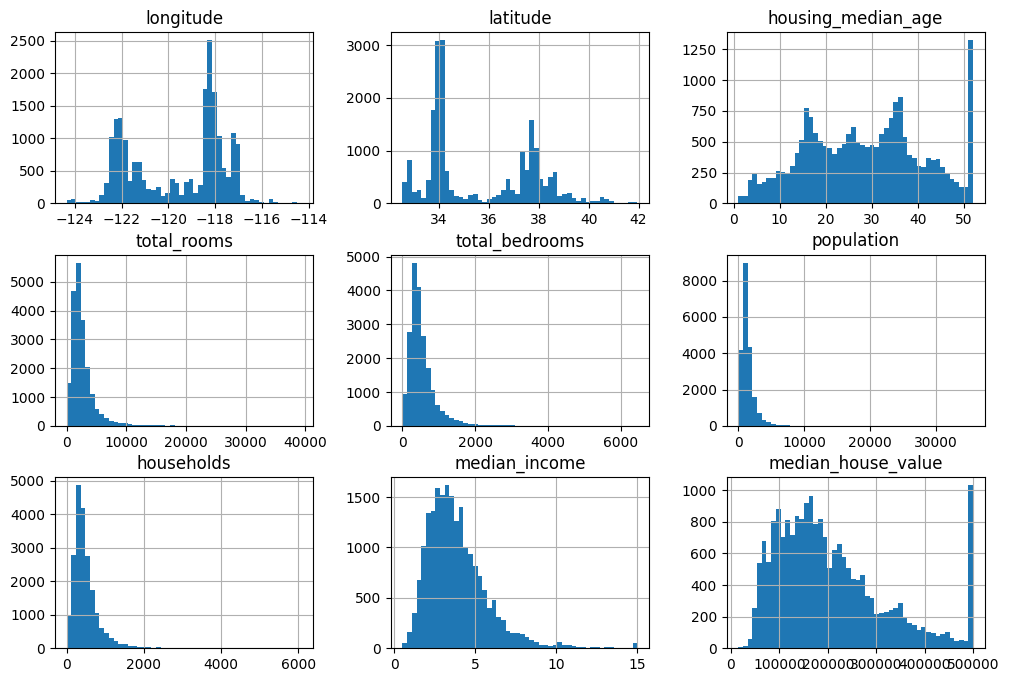

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [10]:
import numpy as np
def shuffle_and_split_data(data,test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_incides=shuffled_indices[test_set_size:]
    return data.iloc[train_incides],data.iloc[test_indices]


In [11]:
train_set,test_set=shuffle_and_split_data(housing,0.2)
len(train_set)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [12]:
len(test_set)

4128

In [13]:
from zlib import crc32
def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32

def split_data_with_id_hash(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [14]:
housing_with_id=housing.reset_index()
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"index")

In [15]:
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"id")

In [16]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [ ]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

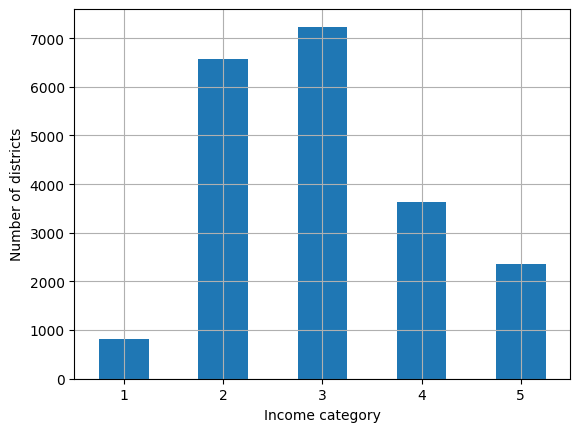

In [18]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [20]:
strat_train_set,strat_test_set=strat_splits[0]

In [21]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing["income_cat"],random_state=42)

In [22]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [23]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

For visualization ,we use training dataset in which we use some part of the training data set as a exporation phase if the data set is very large

In [24]:
housing=strat_train_set.copy()

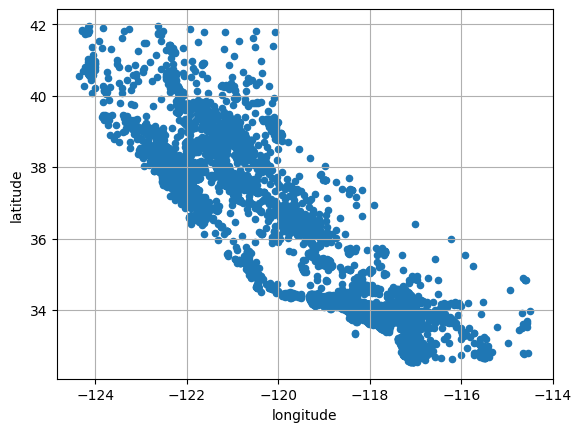

In [25]:
#scatter plot
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True)
plt.show()

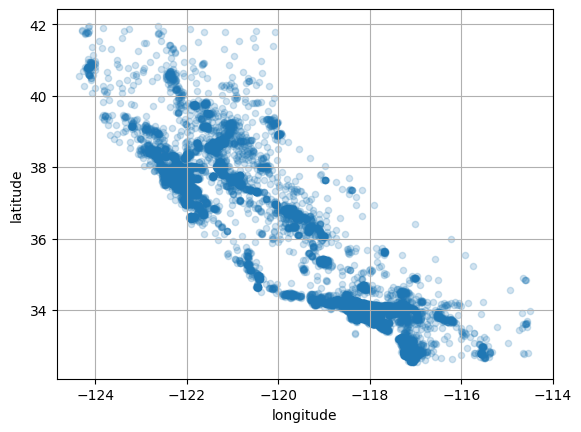

In [26]:
#changing alpha lead to focus on high density districts or points
housing.plot(kind="scatter",x="longitude",y="latitude",grid="True",alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

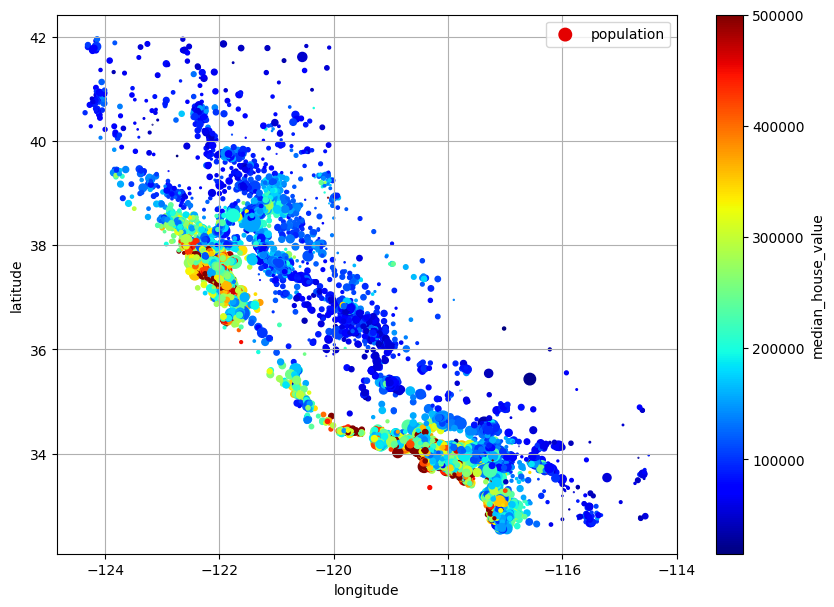

In [27]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,
             s=housing["population"]/100,label="population",c="median_house_value",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))

In [28]:

corr_matrix=housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

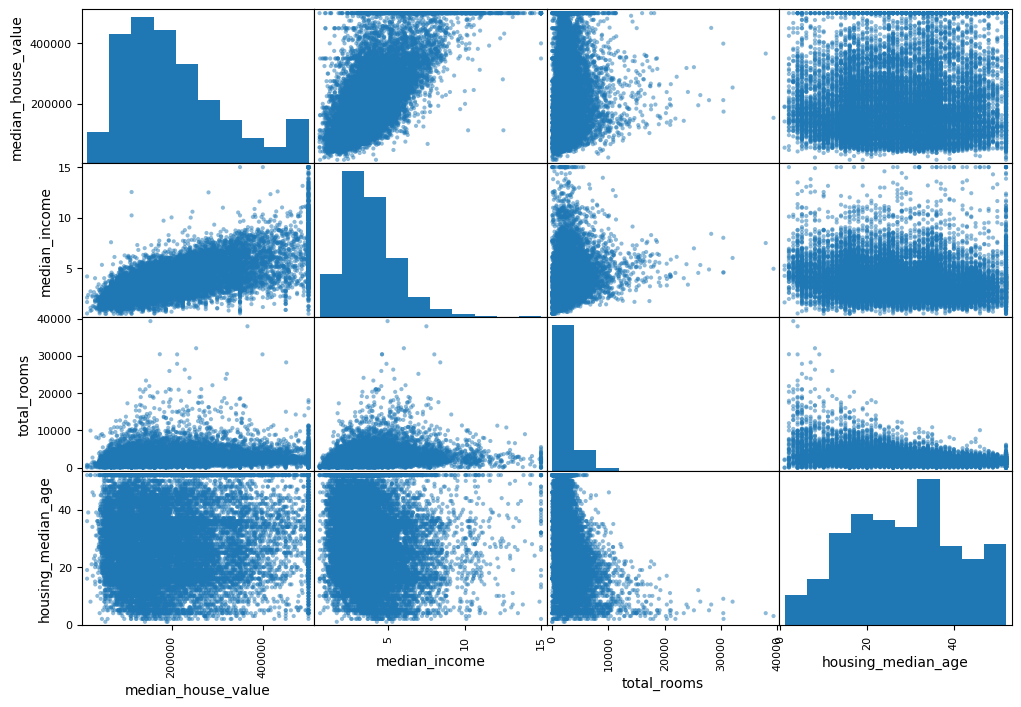

In [30]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

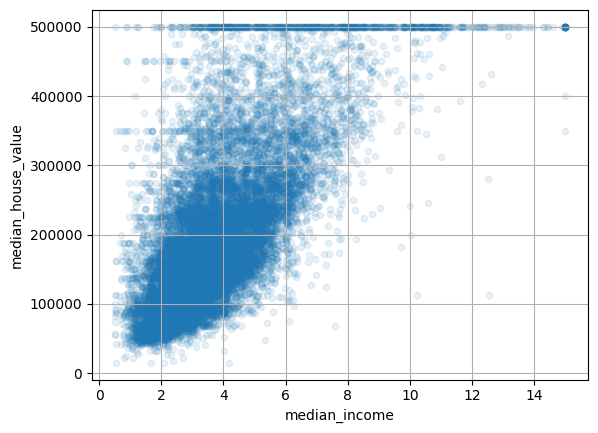

In [31]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
plt.show()

In [32]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedroom_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_houses"]=housing["population"]/housing["households"]

In [33]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_houses    -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

In [34]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [35]:
# housing.dropna(subset=["total_bedrooms"],inplace=True)

# housing.drop("total_bedrooms",axis=1)
median=housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median,inplace=True)
housing["total_bedrooms"]=housing["total_bedrooms"].fillna(median)

In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")


In [37]:
#include=[np.number] suggests to select only numerical features
#dtype whether it is float,int
housing_num=housing.select_dtypes(include=[np.number])

In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [40]:
imputer.strategy

'median'

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [42]:
#it is used to transform the values of training set by replacing missing values with the learned medians

X=imputer.transform(housing_num)
print(X)

[[-1.2242e+02  3.7800e+01  5.2000e+01 ...  1.5760e+03  1.0340e+03
   2.0987e+00]
 [-1.1838e+02  3.4140e+01  4.0000e+01 ...  6.6600e+02  3.5700e+02
   6.0876e+00]
 [-1.2198e+02  3.8360e+01  3.3000e+01 ...  5.6200e+02  2.0300e+02
   2.4330e+00]
 ...
 [-1.1706e+02  3.2590e+01  1.3000e+01 ...  2.8140e+03  7.6000e+02
   4.0616e+00]
 [-1.1840e+02  3.4060e+01  3.7000e+01 ...  1.7250e+03  8.3800e+02
   4.1455e+00]
 [-1.2241e+02  3.7660e+01  4.4000e+01 ...  6.8200e+02  2.1200e+02
   3.2833e+00]]


In [43]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [44]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [45]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)


In [46]:
housing_cat_encoded[:8]


array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [50]:
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [51]:
# housing_cat_1hot.toarray()

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
df_test=pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY","ISLAND"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
0,True,False,False
1,False,False,True
2,False,True,False


In [ ]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [55]:
df_test_unknown=pd.DataFrame({"ocean_proximity":["<2H OCEAN>","ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN>,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [58]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [59]:
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown),columns=cat_encoder.get_feature_names_out(),index=df_test_unknown.index)

In [60]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [62]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

In [63]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

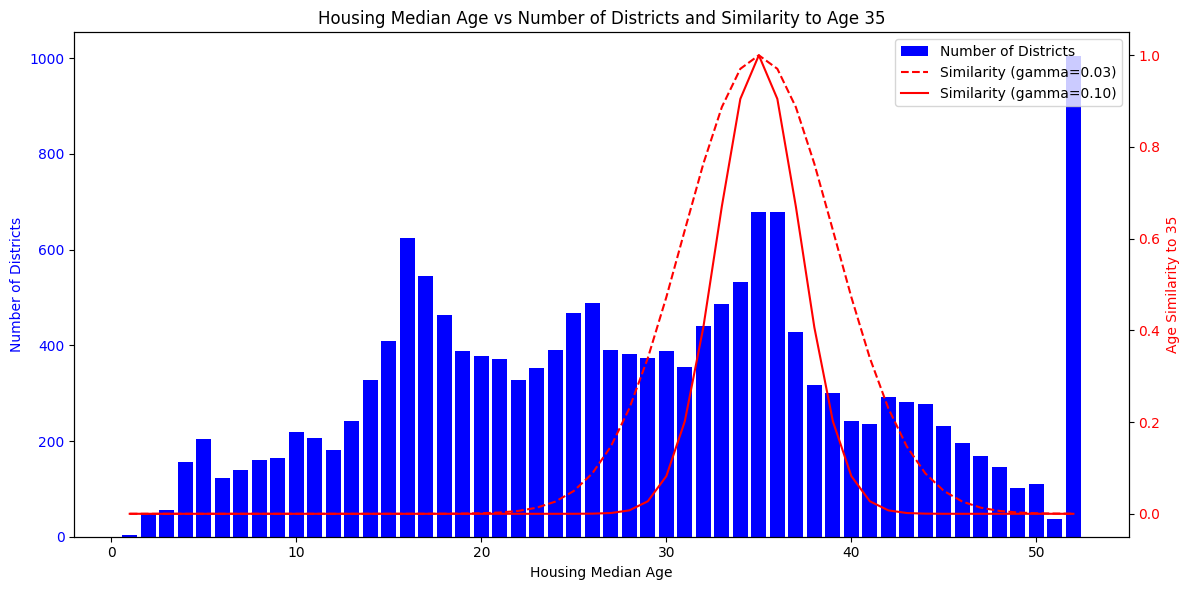

In [64]:
# Assuming `housing` is a DataFrame with a "housing_median_age" column
# Step 1: Count number of districts for each housing_median_age
age_counts = housing["housing_median_age"].value_counts().sort_index()

# Step 2: Calculate RBF similarities with age 35
ages = age_counts.index.values.reshape(-1, 1)
sim_003 = rbf_kernel(ages, [[35]], gamma=0.03).flatten()
sim_010 = rbf_kernel(ages, [[35]], gamma=0.10).flatten()

# Step 3: Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: number of districts per age
ax1.bar(age_counts.index, age_counts.values, color='blue', label='Number of Districts')
ax1.set_xlabel("Housing Median Age")
ax1.set_ylabel("Number of Districts", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for similarity
ax2 = ax1.twinx()
ax2.plot(age_counts.index, sim_003, 'r--', label='Similarity (gamma=0.03)')
ax2.plot(age_counts.index, sim_010, 'r-', label='Similarity (gamma=0.10)')
ax2.set_ylabel("Age Similarity to 35", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legends and title
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.title("Housing Median Age vs Number of Districts and Similarity to Age 35")
plt.tight_layout()
plt.show()


In [65]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [66]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [67]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [68]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [69]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [70]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing["population"])

In [71]:
log_pop

13096    7.362645
14973    6.501290
3785     6.331502
14689    7.520235
20507    7.555905
           ...   
14207    6.843750
13105    7.257708
19301    7.942362
19121    7.452982
19888    6.525030
Name: population, Length: 16512, dtype: float64

In [72]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [73]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [74]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16512, 1))

In [75]:
#it computes the ratio between input features 0 and 1
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in = X.shape[1]
        return self
    
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X-self.mean_
        return X/self.scale_

In [77]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [78]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)

In [79]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

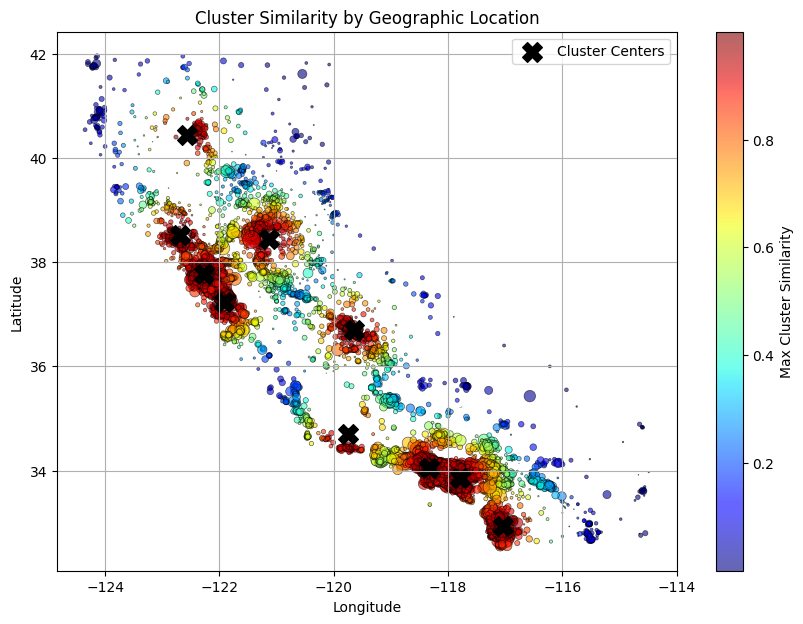

In [ ]:
# Take maximum similarity value per row for color (could also use argmax for cluster assignment)
similarity_scores = similarities.max(axis=1)

# Plotting
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    housing["longitude"],
    housing["latitude"],
    s=housing["population"] / 100,  # adjust size scale for better visualization
    c=similarity_scores,
    cmap="jet",
    alpha=0.6,
    edgecolor="k",
    linewidth=0.5
)

# Mark cluster centers
centers = cluster_simil.kmeans_.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0],  # note: longitude (x) and latitude (y)
            marker="X", s=200, c="black", label="Cluster Centers")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cluster Similarity by Geographic Location")
plt.colorbar(scatter, label="Max Cluster Similarity")
plt.legend()
plt.grid(True)
plt.show()

pipelines

In [81]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), ("standardize", StandardScaler()), ])

In [82]:
#or we can also use the make_pipeline if we dont wanna give the names.
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [83]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [84]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)

In [85]:
df_housing_num_prepared.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
1286,-0.868193,1.088610,1.861119,-0.370856,-0.561571,-0.668194,-0.472739,-0.276883
18078,0.606392,-0.838047,0.430885,-0.710868,-0.808122,-0.837181,-0.893265,1.185526
4396,-1.278077,0.830784,0.589800,0.982782,0.858470,0.560383,1.018690,0.811824


In [86]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

In [87]:
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", cat_pipeline, cat_attribs), ])

In [88]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [89]:
housing_prepared = preprocessing.fit_transform(housing)

In [90]:
def columns_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(columns_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)

In [91]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [92]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x759...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x759e9e70ab10>)])),
                ('linearregression', LinearRegression())])

In [94]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [95]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [96]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68972.88910758478

In [97]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x759...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x759e9e70ab10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [98]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

In [99]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [100]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66551.139927
std       1110.386369
min      64607.896046
25%      66157.004240
50%      66308.879467
75%      66826.257468
max      68532.210664
dtype: float64

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [102]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47052.156858
std       1014.215773
min      45495.976649
25%      46569.493712
50%      47117.033226
75%      47480.519175
max      49155.369239
dtype: float64

In [103]:
from sklearn.svm import SVR

svm_reg = make_pipeline(preprocessing, SVR())
svm_rmses = -cross_val_score(svm_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [104]:
pd.Series(svm_rmses).describe()

count        10.000000
mean     118082.112999
std        2238.586005
min      114844.357579
25%      116124.154997
50%      117970.388757
75%      119901.546068
max      121403.907634
dtype: float64

In [105]:
from sklearn.neural_network import MLPRegressor


mlp_reg=make_pipeline(preprocessing,MLPRegressor(hidden_layer_sizes=(100,),max_iter=100,random_state=42))
mlp_rmses=-cross_val_score(mlp_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)


/home/amrendra/ML/MNIST/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/amrendra/ML/MNIST/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/amrendra/ML/MNIST/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/amrendra/ML/MNIST/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/am

In [106]:
pd.Series(mlp_rmses).describe()

count        10.000000
mean     208736.716860
std        2290.614522
min      205393.674096
25%      207044.943987
50%      208690.460242
75%      210843.664168
max      211756.686697
dtype: float64

In [107]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
     {'preprocessing__geo__n_clusters': [10, 15],
      'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x759e9e70ab10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [108]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [109]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,4.820170,0.045867,0.091853,0.000197,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42735.191274,-43708.197434,-44395.324819,-43612.904509,681.088053,1
13,6.255376,0.007710,0.092250,0.000265,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43549.279784,-43819.842374,-44918.587185,-44095.903114,592.119267,2
6,3.285691,0.027978,0.091284,0.001832,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43871.283925,-44036.240246,-44919.518652,-44275.680941,460.215816,3
9,4.699889,0.056051,0.093833,0.002184,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43759.213378,-44163.463178,-44921.906978,-44281.527845,481.953352,4
7,4.631168,0.032110,0.090357,0.001089,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43759.213378,-44163.463178,-44921.906978,-44281.527845,481.953352,4


In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x759e9c17cfb0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x759ea0ea5160>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [111]:
final_model = rnd_search.best_estimator_
feature_importance = final_model["random_forest"].feature_importances_
feature_importance.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [112]:
sorted(zip(feature_importance, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(np.float64(0.18599734460509476), 'log__median_income'),
 (np.float64(0.07338850855844489), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883976), 'bedrooms__ratio'),
 (np.float64(0.053648710076725316), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894749), 'people_per_house__ratio'),
 (np.float64(0.04175269214442519), 'geo__Cluster 30 similarity'),
 (np.float64(0.025976797232869678), 'geo__Cluster 25 similarity'),
 (np.float64(0.023595895886342255), 'geo__Cluster 36 similarity'),
 (np.float64(0.02021056221732893), 'geo__Cluster 9 similarity'),
 (np.float64(0.01860691707666145), 'geo__Cluster 34 similarity'),
 (np.float64(0.018137988374628867), 'geo__Cluster 37 similarity'),
 (np.float64(0.01740435316632675), 'geo__Cluster 18 similarity'),
 (np.float64(0.016778386143844894), 'geo__Cluster 1 similarity'),
 (np.float64(0.015459009666188978), 'geo__Cluster 7 similarity'),
 (np.float64(0.015325731028175924), 'geo__Cluster 32 similarity'),
 (np.float64(0.0150737720150383

testing on test set


In [118]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [119]:
final_predictions = final_model.predict(X_test)

In [120]:
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41445.533268606625


In [121]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39293.55594722, 43491.1590655 ])

In [122]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']